## Logistic Regression on Copy Number Variation and RNAseq

In [1]:
import pandas as pd

In [2]:
#Import Data
y = pd.read_table('/Users/a.su/Documents/Cancer_RNAseq_CNV/CancerTypes_y.txt', sep = '\t', header = None)
x_cnv = pd.read_table('/Users/a.su/Documents/Cancer_RNAseq_CNV/CNV_processed.txt', sep = '\t', header = 0)
x_rna = pd.read_table('/Users/a.su/Documents/Cancer_RNAseq_CNV/RNAseq_processed.txt', sep = '\t', header = 0)

In [3]:
# Remove GeneID Column
x_cnv = x_cnv.drop('GeneID', axis = 1)
x_rna = x_rna.drop('GeneID', axis = 1)
# Transpose
x_cnv = x_cnv.transpose()
x_rna = x_rna.transpose()
print('x_cnv shape is:', x_cnv.shape)
print('x_rna shape is:', x_rna.shape)
print('y shape is:', y.shape)

x_cnv shape is: (668, 26094)
x_rna shape is: (668, 26094)
y shape is: (668, 1)


#### DropNa from CNV data

In [4]:
#Merge CNV x and y data
cnv = x_cnv.reset_index(drop = True)
cnv['y'] = y[0]

#Drop NaN
cnv_clean = cnv.dropna('index')
print(cnv_clean.shape)

#Unmerge CNV x and y data
y_cnv_clean = cnv_clean['y']
x_cnv_clean = cnv_clean.drop(['y'], axis = 1)

(542, 26095)


#### Impute CNV data

In [110]:
import numpy as np
from sklearn.impute import SimpleImputer
impute_median = SimpleImputer(strategy = 'median')

#Impute 
y_cnv_imputed = cnv['y']
x_cnv_imputed = cnv.drop(['y'], axis = 1)
x_cnv_imputed = impute_median.fit_transform(x_cnv_imputed)
x_cnv_imputed = pd.DataFrame(x_cnv_imputed)

#Check for NaN values
np.isnan(x_cnv_imputed).all().any()

False

#### Remove columns with all zeros

In [121]:
#Count number of columns with all zeros
print('RNA:', x_rna.shape[1] - np.count_nonzero(x_rna.sum(), axis = 0))
print('CNV: ', x_cnv_imputed.shape[1] - np.count_nonzero(x_cnv_imputed.sum(), axis = 0))

RNA: 111
CNV:  0


In [117]:
x_cnv_nozero = x_cnv_imputed.loc[:, (x_cnv_imputed != 0).any(axis = 0)]
x_rna_nozero = x_rna.loc[:, (x_rna != 0).any(axis = 0)]

In [127]:
#Count number of column deletions
print('RNA:', x_rna.shape[1] - x_rna_nozero.shape[1])
print('CNV:', x_cnv_imputed.shape[1] - x_cnv_nozero.shape[1])

RNA: 111
CNV: 0


In [128]:
#Count number of columns with all zeros
print('RNA:', x_rna_nozero.shape[1] - np.count_nonzero(x_rna_nozero.sum(), axis = 0))
print('CNV:', x_cnv_nozero.shape[1] - np.count_nonzero(x_cnv_nozero.sum(), axis = 0))

RNA: 0
CNV: 0


#### Scale RNASeq and CNV data

In [123]:
zscore = lambda x: (x-x.mean())/ x.std()
    
x_cnv_imputed = pd.DataFrame(x_cnv_imputed)

In [124]:
x_rna_processed = x_rna_nozero.transform(zscore)
y_rna_processed = y
x_cnv_processed = x_cnv_nozero.transform(zscore)
y_cnv_processed = y

In [137]:
#Visualise
x_rna_processed[np.random.choice(x_rna_processed.columns.values, size = 10, replace = False)].describe()

,25699,15729,6967,12699,7809,12434,20217,19606,18957,13549
count,6.680000e+02,6.680000e+02,6.680000e+02,6.680000e+02,6.680000e+02,6.680000e+02,6.680000e+02,6.680000e+02,6.680000e+02,6.680000e+02
mean,-1.248502e-15,7.628628e-16,-4.128434e-16,-5.218090e-16,2.486991e-16,1.287227e-16,-2.362049e-15,-4.803210e-16,1.308833e-17,-2.364210e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.866946e+00,-2.790450e-01,-1.039516e+00,-7.184637e-01,-1.757623e-01,-1.297770e-01,-1.754849e+00,-1.513600e+00,-1.591271e-01,-1.551865e-01
25%,-6.880919e-01,-2.790450e-01,-6.588734e-01,-4.562891e-01,-1.757623e-01,-1.297770e-01,-6.682274e-01,-6.756785e-01,-1.537750e-01,-1.551865e-01
50%,-1.888516e-01,-2.790450e-01,-2.449025e-01,-1.850217e-01,-1.757623e-01,-1.297770e-01,-1.576020e-01,-2.085764e-01,-1.416010e-01,-1.551865e-01
75%,4.923382e-01,-2.790450e-01,3.495839e-01,1.649510e-01,-1.093248e-01,-1.297770e-01,4.760393e-01,3.803445e-01,-1.058645e-01,-8.451792e-02
max,4.919673e+00,1.014378e+01,7.141405e+00,1.871807e+01,1.413559e+01,2.454542e+01,8.569005e+00,7.356323e+00,1.683187e+01,1.254320e+01


In [140]:
x_cnv_processed[np.random.choice(x_cnv_processed.columns.values, size = 10, replace = False)].describe()

,9556,20719,12332,24762,5779,11484,6652,19575,16711,12963
count,6.680000e+02,6.680000e+02,6.680000e+02,6.680000e+02,6.680000e+02,6.680000e+02,6.680000e+02,6.680000e+02,6.680000e+02,6.680000e+02
mean,-1.550656e-16,1.090694e-16,-2.991619e-17,-2.021005e-16,-9.147706e-16,-3.422080e-16,-8.311715e-16,1.847377e-16,-1.642066e-16,-1.017150e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.355088e+00,-3.301284e+00,-3.092507e+00,-4.257753e+00,-3.052936e+00,-2.799951e+00,-3.449162e+00,-3.213396e+00,-2.294585e+00,-2.514028e+00
25%,-7.448187e-01,-4.941584e-01,-6.041214e-01,-6.274359e-01,-6.532562e-01,-5.839230e-01,-5.415184e-01,-6.252448e-01,-6.589423e-01,-6.468260e-01
50%,-1.150130e-01,-5.536049e-02,-4.064571e-02,-9.389144e-03,1.015420e-01,4.713359e-02,1.021298e-01,-2.147063e-02,2.073895e-02,2.822666e-02
75%,7.578871e-01,5.584981e-01,6.218858e-01,5.352226e-01,5.382699e-01,3.785631e-01,5.502378e-01,6.074695e-01,4.762113e-01,6.082498e-01
max,3.026410e+00,4.241539e+00,3.033055e+00,3.289627e+00,3.377972e+00,7.053273e+00,5.489120e+00,4.208519e+00,3.948001e+00,3.187391e+00


In [143]:
#Check for NaN values
print(x_rna_processed.isnull().any().any())
print(x_cnv_processed.isnull().any().any())

False
False


### Logistic Regression on CNV and RNAseq Individually (Unprocessed Data)

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [145]:
#Split data into training and test sets
x_cnv_train, x_cnv_test, y_cnv_train, y_cnv_test = train_test_split(x_cnv_clean, y_cnv_clean.values.flatten(), test_size = 0.25, random_state = 0)
x_rna_train, x_rna_test, y_rna_train, y_rna_test = train_test_split(x_rna, y.values.flatten(), test_size = 0.25, random_state = 0)

CNV_regression = LogisticRegression(penalty = 'l1', solver = 'liblinear')
RNA_regression = LogisticRegression(penalty = 'l1', solver = 'liblinear')

#Fit train set
CNV_regression.fit(x_cnv_train, y_cnv_train)
RNA_regression.fit(x_rna_train, y_rna_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [158]:
print('CNV accuracy:', CNV_regression.score(x_cnv_test, y_cnv_test))
print('RNA accurary:', RNA_regression.score(x_rna_test, y_rna_test))

CNV accuracy: 0.7132352941176471
RNA accurary: 0.7904191616766467


### Logistic Regression on CNV and RNAseq Individually (Processed Data)
Processing include imputation and scaling

In [159]:
#Split data into training and test sets
x_cnv_processed_train, x_cnv_processed_test, y_cnv_processed_train, y_cnv_processed_test = train_test_split(
    x_cnv_processed, y_cnv_processed.values.flatten(), test_size = 0.25, random_state = 0)
x_rna_processed_train, x_rna_processed_test, y_rna_processed_train, y_rna_processed_test = train_test_split(
    x_rna_processed, y_rna_processed.values.flatten(), test_size = 0.25, random_state = 0)

CNV_processed_regression = LogisticRegression(penalty = 'l1', solver = 'liblinear')
RNA_processed_regression = LogisticRegression(penalty = 'l1', solver = 'liblinear')

#Fit train set
CNV_processed_regression.fit(x_cnv_processed_train, y_cnv_processed_train)
RNA_processed_regression.fit(x_rna_processed_train, y_rna_processed_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [167]:
print('CNV processed accuracy:', CNV_processed_regression.score(x_cnv_processed_test, y_cnv_processed_test))
print('RNA processed accurary:', RNA_processed_regression.score(x_rna_processed_test, y_rna_processed_test))

CNV processed accuracy: 0.7305389221556886
RNA processed accurary: 0.8383233532934131


### Logistic Regression on combined CNV and RNAseq data (processed)

In [168]:
x_combined = pd.concat([x_cnv_processed.reset_index(drop = True), x_rna_processed.reset_index(drop = True)] , axis = 1)
y_combined = y[0]
x_combined.shape

(668, 52077)

In [180]:
#Visualise
x_combined[np.random.choice(x_combined.columns.values, size = 5, replace = False)].describe()

,11436,11436,15339,15339,9177,9177,5343,5343,3464,3464
count,6.680000e+02,6.680000e+02,6.680000e+02,6.680000e+02,6.680000e+02,6.680000e+02,6.680000e+02,6.680000e+02,6.680000e+02,6.680000e+02
mean,-7.926128e-16,8.177092e-17,-1.761731e-17,1.530504e-16,-1.885551e-16,2.092887e-15,-5.851939e-16,3.543406e-16,6.614802e-17,-2.007709e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.715866e+00,-3.935999e-01,-2.543722e+00,-5.373325e-02,-2.512044e+00,-1.690905e+00,-2.963286e+00,-5.910359e-01,-3.202574e+00,-5.688533e-01
25%,-6.525258e-01,-3.935999e-01,-5.902837e-01,-5.373325e-02,-6.879089e-01,-7.012106e-01,-6.158841e-01,-4.582930e-01,-5.582797e-01,-5.688533e-01
50%,-8.951851e-02,-3.935999e-01,-5.175048e-02,-5.373325e-02,9.349355e-02,-1.793209e-01,-1.344945e-01,-2.653782e-01,-4.390650e-02,-5.688533e-01
75%,6.598661e-01,4.222946e-02,5.213048e-01,-5.373325e-02,5.492888e-01,4.827773e-01,5.725174e-01,1.297114e-01,5.812763e-01,5.325693e-01
max,4.251884e+00,1.165433e+01,4.837290e+00,2.141069e+01,6.382945e+00,5.917028e+00,4.636938e+00,1.819937e+01,7.185707e+00,6.393372e+00


In [191]:
#Split data into training and test sets
x_combined_train, x_combined_test, y_combined_train, y_combined_test = train_test_split(
    x_combined, y_combined.values.flatten(), test_size = 0.25, random_state = 0)

Combined_regression = LogisticRegression(penalty = 'l1',solver = 'liblinear', random_state = 0)
Combined_regression.fit(x_combined_train, y_combined_train)
Combined_regression.score(x_combined_test, y_combined_test)

0.8323353293413174

In [192]:
combined_prediction = Combined_regression.predict(x_combined_test)

#### Precision Recall Curve

In [55]:
from sklearn.metrics import precision_recall_curve, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

In [35]:
precision, recall, _ = precision_recall_curve(y_combined_test, combined_prediction)

In [53]:
y_combined_test.sum()

53

In [51]:
combined_prediction.shape

(167,)

In [36]:
precision_recall = list(zip(precision,recall))

In [37]:
precision_recall

[(0.31736526946107785, 1.0),
 (0.7735849056603774, 0.7735849056603774),
 (1.0, 0.0)]

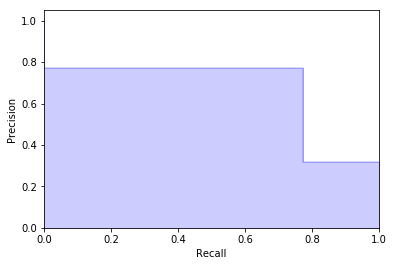

In [38]:
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

#### ROC Curve

In [40]:
fpr, tpr, thresholds = roc_curve(y_combined_test, combined_prediction)

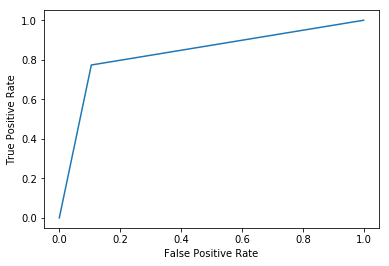

In [42]:
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [57]:
roc_auc_score(y_combined_test, combined_prediction)

0.8341608738828203

#### Confusion Matrix

In [45]:
confusion_matrix(y_combined_test, combined_prediction)

array([[102,  12],
       [ 12,  41]])

In [47]:
import seaborn as sns

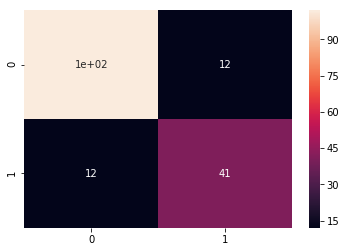

In [49]:
sns.heatmap(confusion_matrix(y_combined_test, combined_prediction), annot = True)

#### Grid Search

In [86]:
from sklearn.model_selection import GridSearchCV

In [164]:
#c_values = [0.001, 0.01, 1, 10, 100, 1000]
c_values = [1,5,6,7,8,9,10,11,12,13,14,15,20,50]
parameters = {'C': c_values, 'penalty': ['l1','l2'], 'solver': ['liblinear']}
clf = GridSearchCV(cv = 3, estimator = Combined_regression, param_grid = parameters)

In [165]:
clf.fit(x_combined_train, y_combined_train)

/Users/a.su/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 50], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [166]:
clf.best_score_

0.812375249500998

In [167]:
clf.score(x_combined_test, y_combined_test)

0.8203592814371258

In [168]:
clf.best_params_

{'C': 12, 'penalty': 'l1', 'solver': 'liblinear'}

#### Elastic Net

In [78]:
from sklearn.linear_model import SGDClassifier

In [81]:
SGD = SGDClassifier(alpha = 0.1, epsilon = 0.01, max_iter = 100, penalty = 'elasticnet')

In [82]:
SGD.fit(x_combined_train, y_combined_train)

SGDClassifier(alpha=0.1, average=False, class_weight=None,
       early_stopping=False, epsilon=0.01, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=100,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='elasticnet',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [83]:
SGD.score(x_combined_test, y_combined_test)

0.7365269461077845

In [84]:
SGD_parameters = {'alpha': [0.001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'penalty':['elasticnet'], 
                  'epsilon': [0.001, 0.01, 0.1, 1, 10]}

In [88]:
SGD_search = GridSearchCV(estimator = SGD, param_grid= SGD_parameters)

In [89]:
SGD_search.fit(x_combined_train, y_combined_train)

/Users/a.su/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


KeyboardInterrupt: 

In [ ]:
SGD_search.score(x_combined_test, y_combined_test)

In [ ]:
SGD_search.best_params_